# FitzHugh-Nagumo Mutual Information
This file is to create code for time delay with FN. When the code is finished, it should be moved to `mutual_information.py` under `get_fn_data()`. 


In [1]:
from fn import *
from mutual_information import *
from scipy.signal import find_peaks
from animate import *

In [2]:
# Parameters
T = 3000
t0 = 0
dt = 0.1
dx = 1
s = 0.02 # 0.02 # 0.10

N = 128
n = int(N / dx)
D = 1
a = 0.5
b = 0.7
c = 0.3
I = 1.0 # 1.0 # 0.5 # 1.0
w_h = 1
w_l = 1
noise = s
stim = [ [[25, 40], [n // 2 - 5, n // 2 + 5], [n // 2 - 5, n // 2 + 5]] ]

other_params = {
    "dx": dx
}
params = {
    "N": N,
    "n": n,
    "T": T,
    "dt": dt,
    "D": D,
    "a": a,
    "b": b,
    "c": c,
    "I0": I,
    # stim protocol, array of elements [[t0,t1], [x0,x1], [y0,y1]]
    "stim": stim,

    "w_h": w_h,
    "w_l": w_l,

    "noise": noise
}
eq = FHN(**params)

In [16]:
params

{'N': 128,
 'n': 128,
 'T': 3000,
 'dt': 0.1,
 'D': 1,
 'a': 0.5,
 'b': 0.7,
 'c': 0.3,
 'I0': 1.0,
 'stim': [[[25, 40], [59, 69], [59, 69]]],
 'w_h': 1,
 'w_l': 1,
 'noise': 0.02}

In [3]:
# Solution
def get_initial_state():
    # grid = UnitGrid((N, N))
    shape = (n, n)
    grid = CartesianGrid([(0, N), (0, N)], shape)
    data_v = np.zeros(shape)
    data_w = np.zeros(shape)
    # data_v[N // 2, N // 2] = I
    v0 = ScalarField(grid, data_v)
    w0 = ScalarField(grid, data_w)
    return grid, FieldCollection((v0, w0))

grid, vw0 = get_initial_state()
memory_storage = MemoryStorage()
result = eq.solve(vw0, t_range=T * dt, dt=dt, tracker=[memory_storage.tracker(dt)])

data = np.array(memory_storage.data)
vs = data[:, 0, :]
ws = data[:, 1, :]


In [13]:
ws = data[:, 1, :]

In [6]:
# Signals
# n = 128
nodes = np.array([
    [32, 31],
    [84, 27],
    # [97, 47],
    # [75, 94],
    # [7, 112]
])
signals = np.array([vs[:, node[0], node[1]] for node in nodes], copy=False)
signalsw = np.array([ws[:, node[0], node[1]] for node in nodes], copy=False)
signals = signals[:, 400:1000]
signalsw = signalsw[:, 400:1000]


In [5]:
root = np.array([64, 64])
diffs = nodes - root
np.array([np.sqrt(np.dot(diff, diff)) for diff in diffs])

array([45.96737974, 42.05948169])

[-191 -122  -82  -14   27   92  135]


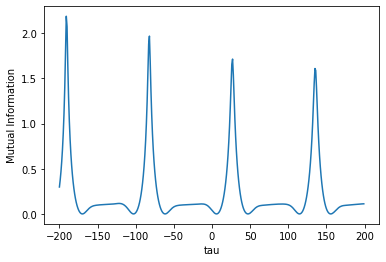

In [7]:
# Mutual Information
shifts = np.arange(-200, 200, 1)
mis = mi_shift(signals.T, shifts=shifts)
mean = np.mean(mis)
peaks, _ = find_peaks(mis)
print(shifts[peaks])
plt.plot(shifts, mis)
plt.xlabel("tau")
plt.ylabel("Mutual Information")
plt.show()


In [7]:
# [(b - a, c - b, d - c) for a, b, c, d in (peaks[::2],)]

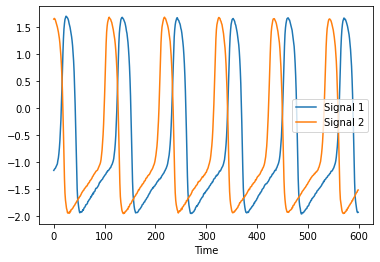

In [8]:
xs, ys = signals
tau = 25
# plt.plot(xs[tau:])
# plt.plot(ys[:-tau])
plt.plot(xs, label="Signal 1")
plt.plot(ys, label="Signal 2")
plt.legend()
plt.xlabel("Time")
plt.show()

In [9]:
np.save("signals.npy", signals)
np.save("mis.npy", mis)

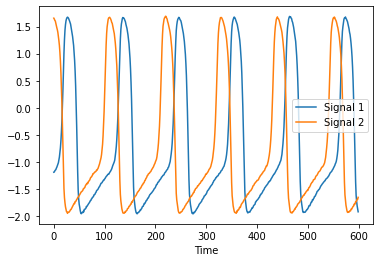

In [9]:
xs, ys = signals
tau = 25
# plt.plot(xs[tau:])
# plt.plot(ys[:-tau])
plt.plot(xs, label="Signal 1")
plt.plot(ys, label="Signal 2")
plt.legend()
plt.xlabel("Time")
plt.show()

In [15]:
frames = vs.copy()
frames[(slice(None), *nodes[0])] = 0
frames[(slice(None), *nodes[1])] = 0
animate_video("./video.mp4", frames)


nt = 3001, nx = 128, ny = 128
i = 3000/3001
